In [128]:
from numpy import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
train = pd.read_csv('../Data/train.csv', index_col=[0])
test = pd.read_csv('../Data/test.csv', index_col=[0])

In [130]:
Xtrain = pd.read_csv('../Data/New/XtrainNew.csv', index_col=[0])
Xtest = pd.read_csv('../Data/New/XtestNew.csv', index_col=[0])

In [131]:
Xtrain.head()

,0
0,really recommend anyone need new player
1,good every day camera fit nicely pocket jean t...
2,dollar dollar dvd player probably best
3,got phone yesterday find problem yet
4,price gb storage


In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk as nlp
from nltk.corpus import stopwords

In [133]:
# Obtain list of stopwords
stop_words = set(stopwords.words('english'))

In [134]:
Xtrain['text'] = train.text

In [135]:
Xtrain.iloc[1655,:]

0                 NaN
text    it has it all
Name: 1655, dtype: object

In [136]:
Xtrain.iloc[1655,0] = 'it has it all'

In [137]:
tfidf_vectorizador = TfidfVectorizer(stop_words=stop_words ,min_df=2)
tfidf_vectorizador.fit(Xtrain['0'])

TfidfVectorizer(min_df=2,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [138]:
Xtrain = tfidf_vectorizador.fit_transform(Xtrain['0'])
Xtest = tfidf_vectorizador.transform(Xtest['0'])

In [139]:
Ytrain = train.label

In [140]:
pd.DataFrame(Xtrain.toarray(), columns=tfidf_vectorizador.get_feature_names_out())

,ability,able,absolute,absolutely,ac,acceptable,access,accessible,accessing,accessory,...,yes,yesterday,yet,yield,zealand,zen,zennx,zero,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.568211,0.454485,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.452703,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [142]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [143]:
models = []
models.append(('glm', LogisticRegression(random_state=99)))
models.append(('dectree', DecisionTreeClassifier(random_state=99)))
models.append(('rf', RandomForestClassifier(random_state=99)))
models.append(('gb', GradientBoostingClassifier(random_state=99)))
models.append(('xgb', XGBClassifier()))
models.append(('bag', BaggingClassifier(random_state=99)))
models.append(('svmr', SVC(random_state=99)))
models.append(('svml', SVC(kernel='linear', random_state=99)))


def boxplots_algorithms(results, names):
    plt.figure(figsize=(8, 8))
    plt.boxplot(results)
    plt.xticks(range(1, len(names) + 1), names)
    plt.show()

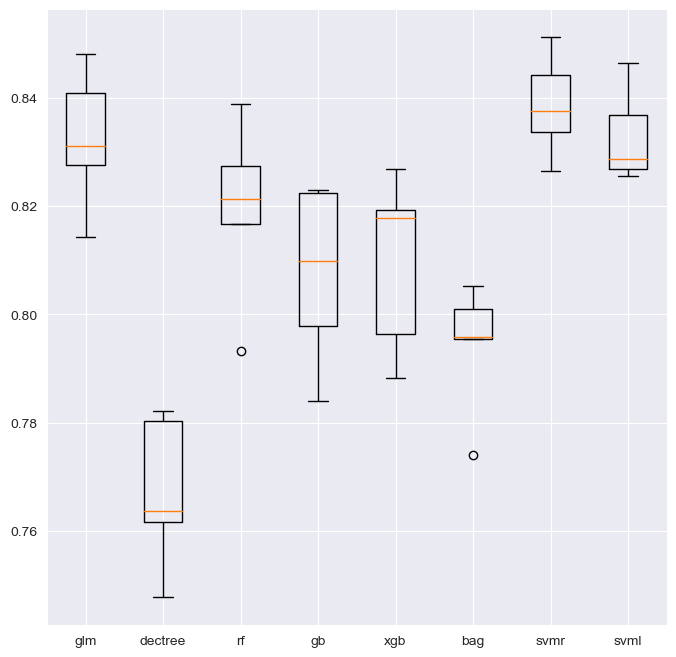

In [144]:
results = []
names = []

for name, model in models:
    acc = cross_val_score(model, Xtrain, Ytrain, cv=kf, scoring='f1')
    names.append(name)
    results.append(acc)

boxplots_algorithms(results, names)

In [145]:
svm = SVC(random_state=99, kernel = 'linear')
svm.fit(Xtrain,Ytrain)
mean(cross_val_score(svm,Xtrain,Ytrain,scoring = 'f1',cv = kf))

0.832914539551948

In [146]:
mean(cross_val_score(svm,Xtrain,Ytrain,scoring = 'accuracy',cv = kf))

0.7748701305832866

In [147]:
data = pd.DataFrame(svm.coef_.toarray(), columns=tfidf_vectorizador.get_feature_names_out())
data

,ability,able,absolute,absolutely,ac,acceptable,access,accessible,accessing,accessory,...,yes,yesterday,yet,yield,zealand,zen,zennx,zero,zone,zoom
0,0.146019,0.267375,0.341288,0.397044,0.259625,0.560377,-0.250335,0.248576,-0.726029,0.013871,...,-0.959272,0.087498,0.885314,0.085434,0.459515,0.500925,-0.316454,-0.620906,-0.837327,-0.23528


In [148]:
data = data.T
data

,0
ability,0.146019
able,0.267375
absolute,0.341288
absolutely,0.397044
ac,0.259625
...,...
zen,0.500925
zennx,-0.316454
zero,-0.620906
zone,-0.837327


In [149]:
data['abs'] = abs(data)
data.reset_index(inplace= True)
data.sort_values(by = 'abs', ascending= False)

,index,0,abs
803,great,3.148710,3.148710
1077,love,2.367070,2.367070
797,good,2.295454,2.295454
2121,would,-2.294201,2.294201
1650,scratch,-2.289139,2.289139
...,...,...,...
1293,ot,0.000000,0.000000
1447,printer,0.000000,0.000000
957,jacket,0.000000,0.000000
457,decade,0.000000,0.000000


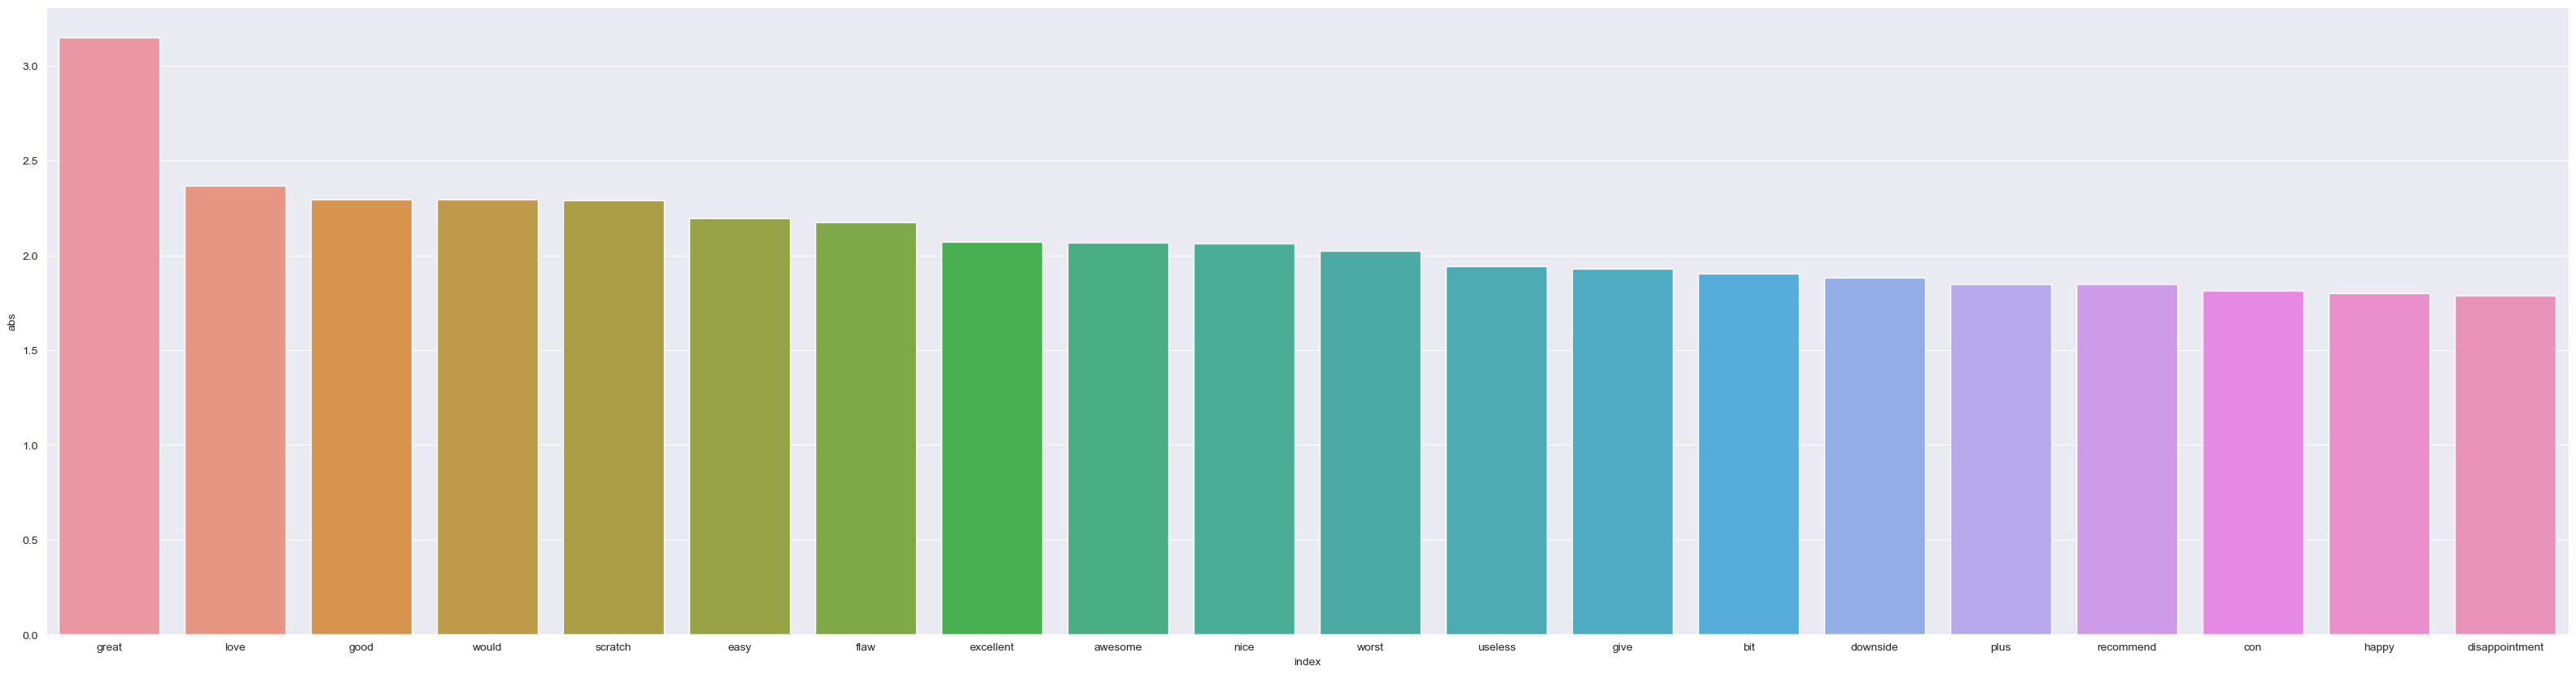

In [150]:
data = data.sort_values(by = 'abs', ascending= False)
plt.figure(figsize=(40,10))
sns.barplot(data = data.iloc[:20,:], x = 'index' ,y = 'abs')
plt.show()